# Project Notebook for predicting house prices

In [1]:
# Import libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression

from src.constants import RANDOM_SEED
from src import data_engineering
from src import models
from src import results_viz

## Data Preparation

- Importing dataset to see information and statistics
- Check for duplicates and missing values
- Exploratory Data Analysis

In [2]:
# Import Dataset

df = pd.read_csv("data/real_estate_data.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


In [4]:
# Information and statistics

df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


(None,
               price          area    bedrooms   bathrooms     stories  \
 count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
 mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
 std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
 min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
 25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
 50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
 75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
 max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   
 
          mainroad   guestroom    basement  hotwaterheating  airconditioning  \
 count  545.000000  545.000000  545.000000       545.000000       545.000000   
 mean     0.858716    0.177982    0.350459         0.045872         0.315596   
 std      0.348635    0.382849    0.477552         0.209399         0.465180   
 min 

In [3]:
# Convert categorical features from int64 to category

cat_features = ['bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']

df_categorical = data_engineering.convert_to_category(df, cat_features)
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    category
 3   bathrooms         545 non-null    category
 4   stories           545 non-null    category
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    category
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(11), int64(2)
memory usage: 16.2 KB


In [4]:
# Remove duplicates if exist

df_cleaned = data_engineering.handle_duplicates(df_categorical)

No duplicates found!


In [13]:
# Handling missing values

df_cleaned.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

### Exploratory Data Analysis

In [14]:
# Price Distribution

data_engineering.plot_feature_distribution(df_cleaned, 'price', is_categorical=False)

In [15]:
# area Distribution

data_engineering.plot_feature_distribution(df_cleaned, 'area', is_categorical=False)

In [16]:
# Price Distribution compared with other categorical feature

cat_feature = 'prefarea'

data_engineering.plot_feature_distribution(df_cleaned, 'price', is_categorical=False, comparison=cat_feature)

In [23]:
# Scatter Plot Price vs Area with possibility to see comparison with other feature

comparison = 'bathrooms'   # None to see only the Price vs Area

fig = px.scatter(
    df_cleaned,
    x = 'area', y = 'price',
    color = comparison,
    labels={'area':'Area', 'price':'Price'},
    title= 'Scatter Plot of Price vs Area' if not comparison else f'Scatter Plot of Price vs Area compared with {comparison}'
)

fig.show()

In [18]:
# Distribution for categorical features

cat_feature = 'bedrooms'

data_engineering.plot_feature_distribution(df_cleaned, cat_feature, is_categorical=True)

/Users/silvanoquarto/Desktop/PROJECTS/Master_AI_Engineering/Prediction-model-for-a-real-estate-market/src/data_engineering.py:32: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [19]:
# Distribution for categorical features compared with price target

cat_feature = 'bedrooms'

data_engineering.plot_feature_distribution(df_cleaned, cat_feature, is_categorical=True, comparison=True)

/Users/silvanoquarto/Desktop/PROJECTS/Master_AI_Engineering/Prediction-model-for-a-real-estate-market/src/data_engineering.py:32: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [20]:
# Distribution for categorical features

cat_feature = 'bathrooms'

data_engineering.plot_feature_distribution(df_cleaned, cat_feature, is_categorical=True)

/Users/silvanoquarto/Desktop/PROJECTS/Master_AI_Engineering/Prediction-model-for-a-real-estate-market/src/data_engineering.py:32: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [21]:
# Distribution for categorical features compared with price target

cat_feature = 'bathrooms'

data_engineering.plot_feature_distribution(df_cleaned, cat_feature, is_categorical=True, comparison=True)

/Users/silvanoquarto/Desktop/PROJECTS/Master_AI_Engineering/Prediction-model-for-a-real-estate-market/src/data_engineering.py:32: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Feature Engineering

- Encoding the feature with more then 2 as unique values using get_dummies()
- Splitting dataset into training and test using train_test_split()
- Feature Scaling using a fit_transform with X_train and just transform the X_test

In [5]:
# Dummy Encoding for categorical features with unique value greater than 2

df_encoded = data_engineering.apply_encoding(df_cleaned)
df_encoded.head()

,price,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,bedrooms_2,bedrooms_3,...,bathrooms_3,bathrooms_4,stories_2,stories_3,stories_4,parking_1,parking_2,parking_3,furnishingstatus_1,furnishingstatus_2
0,13300000,7420,1,0,0,0,1,1,0,0,...,0,0,0,1,0,0,1,0,1,0
1,12250000,8960,1,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,1,0
2,12250000,9960,1,0,1,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,1
3,12215000,7500,1,0,1,0,1,1,0,0,...,0,0,1,0,0,0,0,1,1,0
4,11410000,7420,1,1,1,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0


In [7]:
# Splitting dataset into training and test

X = df_encoded.drop(columns=['price'])
y = df_encoded.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED)

print(f'Dataset Shape: {df_encoded.shape}')
print(f'Training Shape: {X_train.shape}')
print(f'Test Shape: {X_test.shape}')

Dataset Shape: (545, 24)
Training Shape: (381, 23)
Test Shape: (164, 23)


In [8]:
# Feature Scaling with Standardization

X_train_scaled, X_test_scaled = data_engineering.feature_scaling_standardization(X_train, X_test)

print("Training after Standardization:")
display(X_train_scaled.describe())

print("Test after Standardization:")
display(X_test_scaled.describe())

Training after Standardization:


,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,bedrooms_2,bedrooms_3,bedrooms_4,...,bathrooms_3,bathrooms_4,stories_2,stories_3,stories_4,parking_1,parking_2,parking_3,furnishingstatus_1,furnishingstatus_2
count,3.810000e+02,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,...,381.000000,381.0,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,-1.305459e-16,0.855643,0.191601,0.341207,0.047244,0.328084,0.212598,0.236220,0.553806,0.178478,...,0.015748,0.0,0.459318,0.065617,0.073491,0.230971,0.196850,0.026247,0.246719,0.404199
std,1.001315e+00,0.351913,0.394078,0.474738,0.212440,0.470133,0.409684,0.425318,0.497750,0.383418,...,0.124663,0.0,0.498997,0.247937,0.261284,0.422008,0.398141,0.160078,0.431669,0.491382
min,-1.601376e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.025624e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.622344e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.094743e-01,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.003543e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Test after Standardization:


,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,bedrooms_2,bedrooms_3,bedrooms_4,...,bathrooms_3,bathrooms_4,stories_2,stories_3,stories_4,parking_1,parking_2,parking_3,furnishingstatus_1,furnishingstatus_2
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,...,164.00000,164.000000,164.000000,164.000000,164.000000,164.000000,164.00000,164.000000,164.000000,164.000000
mean,-0.040936,0.865854,0.146341,0.371951,0.042683,0.286585,0.286585,0.280488,0.542683,0.164634,...,0.02439,0.006098,0.384146,0.085366,0.079268,0.231707,0.20122,0.012195,0.280488,0.445122
std,0.948835,0.341853,0.354531,0.484806,0.202760,0.453551,0.453551,0.450613,0.499701,0.371986,...,0.15473,0.078087,0.487882,0.280281,0.270984,0.423215,0.40214,0.110092,0.450613,0.498501
min,-1.578679,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,-0.770654,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,-0.271313,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,0.628635,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,1.000000
max,3.641704,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


## Regression Models Implementation

- Implmentation and training for four kinds of models: Linera Regression, Ridge, Lasso, ElasticNet
- First performance evaluation using Mean Squared Error and R^2 (just a first touch with performances)

In [9]:
# Training models

linear_model = models.train_model(X_train, y_train, model_type='linear')

ridge_model = models.train_model(X_train, y_train, model_type='ridge', alpha=1.0)

lasso_model = models.train_model(X_train, y_train, model_type='lasso', alpha=1.0)

elasticnet_model = models.train_model(X_train, y_train, model_type='elasticnet', alpha=1.0, l1_ratio = 0.5)

In [10]:
# Evaluate models performance

print("-"*40)
print("Linear Regression Model:")
models.evaluate_model(ridge_model, X_test, y_test, X_train, y_train)

print("-"*40)
print("Ridge Regression Model:")
models.evaluate_model(ridge_model, X_test, y_test, X_train, y_train)

print("-"*40)
print("Lasso Regression Model:")
models.evaluate_model(lasso_model, X_test, y_test, X_train, y_train)

print("-"*40)
print("ElasticNet Regression Model:")
models.evaluate_model(elasticnet_model, X_test, y_test, X_train, y_train)
print("-"*40)

----------------------------------------
Linear Regression Model:
Mean Squared Error for Training set: 918721617744.18
R^2 Score for Training set: 0.6906
Mean Squared Error for Test set: 1818487345565.49
R^2 Score for Test set: 0.6110
----------------------------------------
Ridge Regression Model:
Mean Squared Error for Training set: 918721617744.18
R^2 Score for Training set: 0.6906
Mean Squared Error for Test set: 1818487345565.49
R^2 Score for Test set: 0.6110
----------------------------------------
Lasso Regression Model:
Mean Squared Error for Training set: 917026011257.78
R^2 Score for Training set: 0.6911
Mean Squared Error for Test set: 1815126874955.11
R^2 Score for Test set: 0.6117
----------------------------------------
ElasticNet Regression Model:
Mean Squared Error for Training set: 1513222149836.81
R^2 Score for Training set: 0.4903
Mean Squared Error for Test set: 2459331552605.26
R^2 Score for Test set: 0.4740
----------------------------------------


## Performance Evaluation

In [5]:
model_types = ['linear', 'ridge', 'lasso', 'elasticnet']

df_encoded = data_engineering.apply_encoding(df_cleaned)

X = df_encoded.drop(columns=['price'])
y = df_encoded.price

results, y_true_pred = models.evaluate_models_with_kfold(X, y, model_types, k = 5, alpha=0.1, l1_ratio=0.5)

------------------------------
Evaluating Fold 1:
Training Linear model...
Training Ridge model...
Training Lasso model...
Training Elasticnet model...
------------------------------
------------------------------
Evaluating Fold 2:
Training Linear model...
Training Ridge model...
Training Lasso model...
Training Elasticnet model...
------------------------------
------------------------------
Evaluating Fold 3:
Training Linear model...
Training Ridge model...
Training Lasso model...
Training Elasticnet model...
------------------------------
------------------------------
Evaluating Fold 4:
Training Linear model...
Training Ridge model...
Training Lasso model...
Training Elasticnet model...
------------------------------
------------------------------
Evaluating Fold 5:
Training Linear model...
Training Ridge model...
Training Lasso model...
Training Elasticnet model...
------------------------------


/Users/silvanoquarto/Desktop/PROJECTS/Master_AI_Engineering/Prediction-model-for-a-real-estate-market/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.235e+13, tolerance: 1.444e+11
  model = cd_fast.enet_coordinate_descent(
/Users/silvanoquarto/Desktop/PROJECTS/Master_AI_Engineering/Prediction-model-for-a-real-estate-market/.venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.179e+14, tolerance: 1.481e+11
  model = cd_fast.enet_coordinate_descent(


In [9]:
# Plot results for training and test

fig, summary_df = models.plot_mse_summary(results, metric='mse')

fig.show()

In [10]:
# Tabular view

summary_df

,Model,Dataset,Mean_MSE,Std_MSE
0,linear,Train,1.068254e+12,4.450189e+10
1,linear,Test,1.316429e+12,2.155784e+11
2,ridge,Train,1.068773e+12,4.452742e+10
3,ridge,Test,1.314978e+12,2.167801e+11
4,lasso,Train,1.068254e+12,4.450189e+10
5,lasso,Test,1.316427e+12,2.155792e+11
6,elasticnet,Train,1.219403e+12,6.439366e+10
7,elasticnet,Test,1.352912e+12,2.937068e+11


In [11]:
# Models complexity with non zero coefficients

models.plot_model_complexity(results)

## Results Visualization

- Bar plots and Violin plots to see models performances for both train and test set

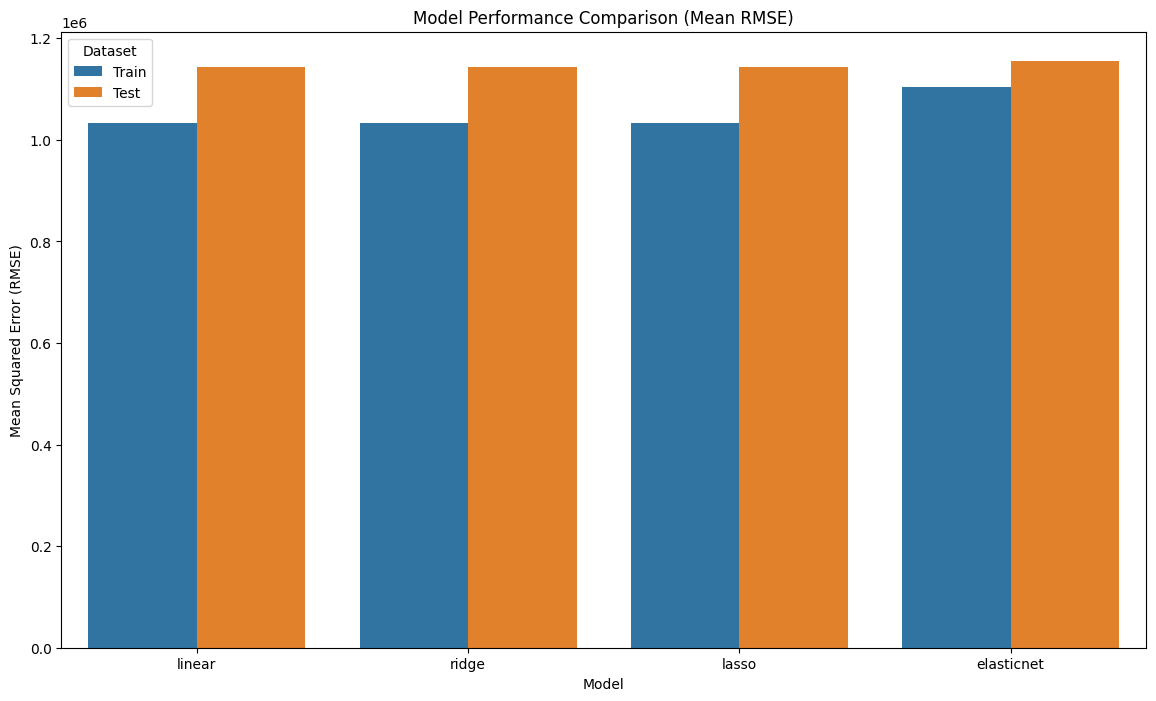

In [12]:
# Bar Plot to view models performances 

summary_df = results_viz.plot_model_performance(results, metric='rmse')

In [13]:
# Tabular view

summary_df

,Model,Dataset,Mean_RMSE,Std_RMSE
0,linear,Train,1.033346e+06,21230.610439
1,linear,Test,1.143344e+06,95882.385692
2,ridge,Train,1.033596e+06,21237.441954
3,ridge,Test,1.142657e+06,96504.371429
4,lasso,Train,1.033346e+06,21230.610414
5,lasso,Test,1.143343e+06,95882.773305
6,elasticnet,Train,1.103891e+06,28747.624827
7,elasticnet,Test,1.155195e+06,135785.687316


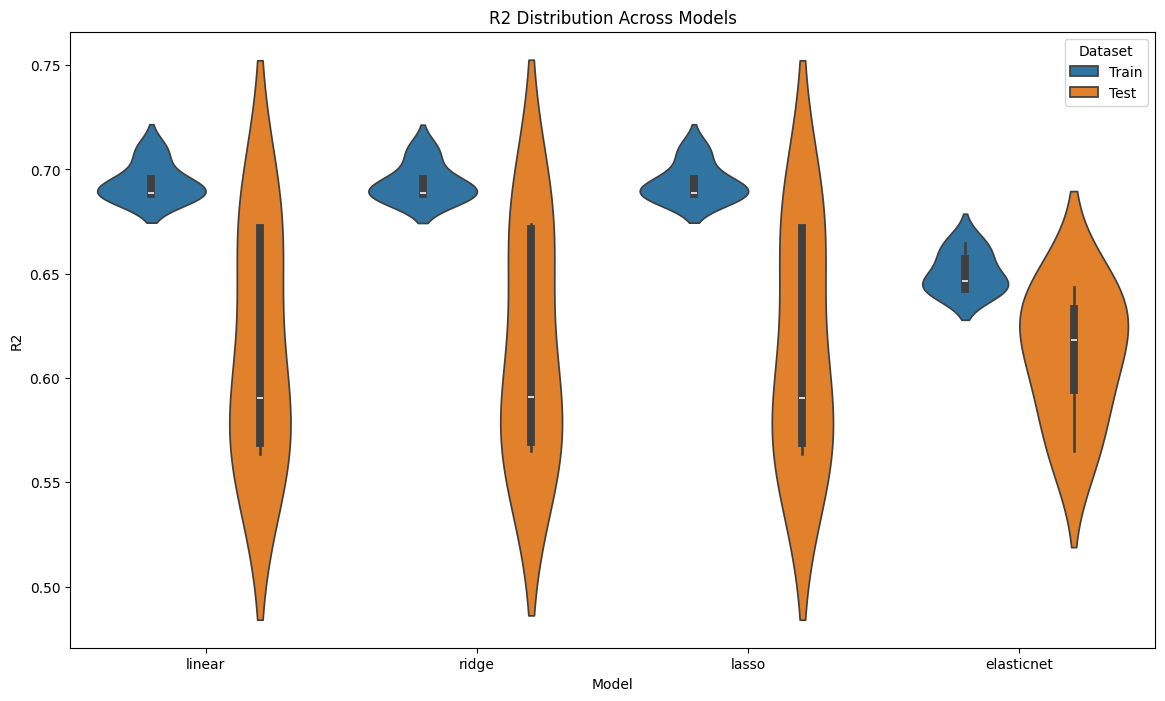

In [14]:
# Violin Plot to view models performances 

results_viz.violin_plots_performance(results, metric='r2')

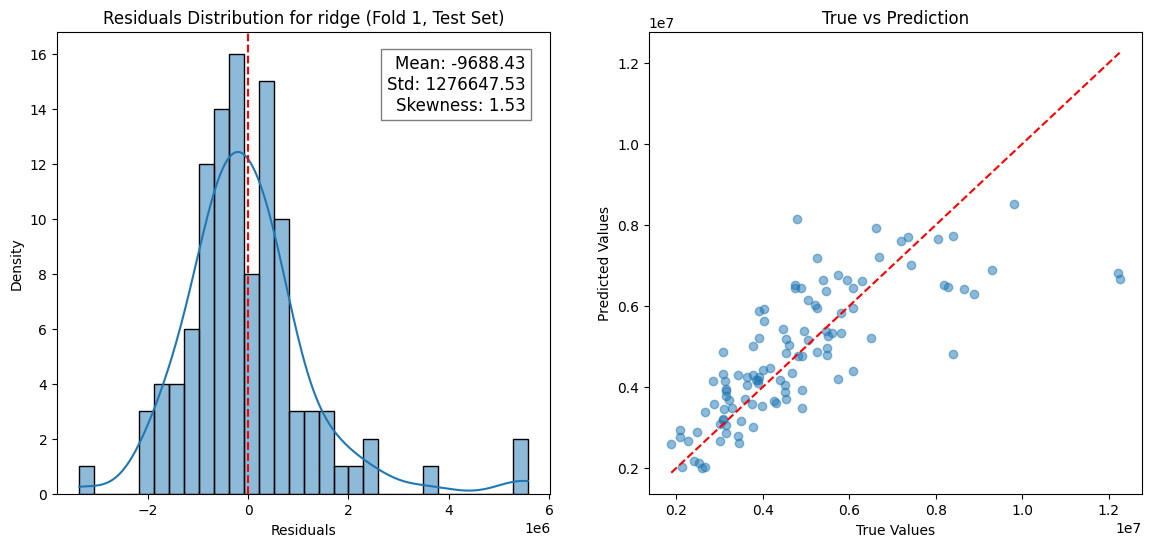

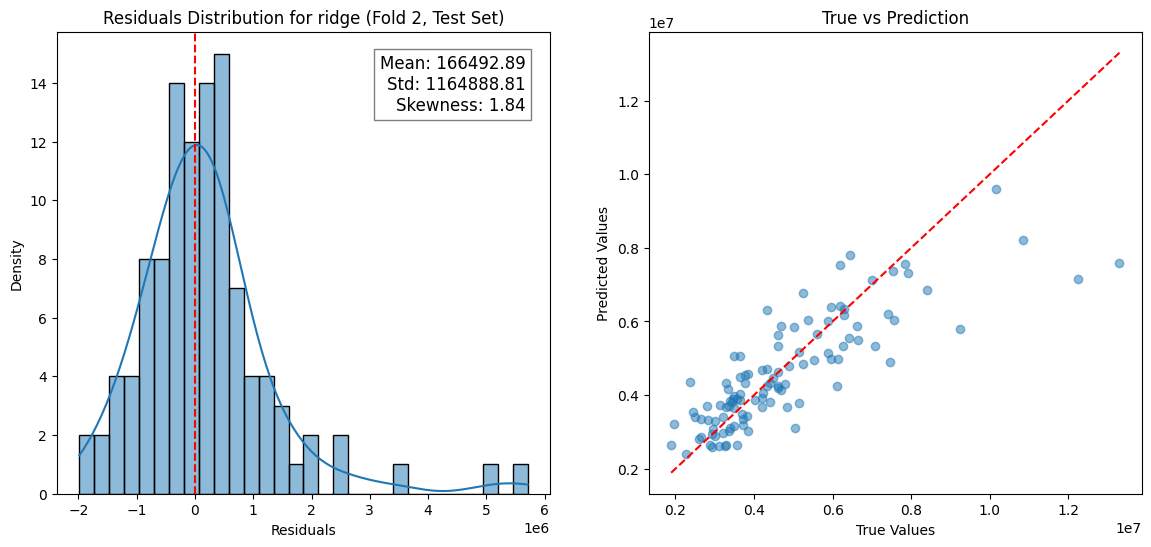

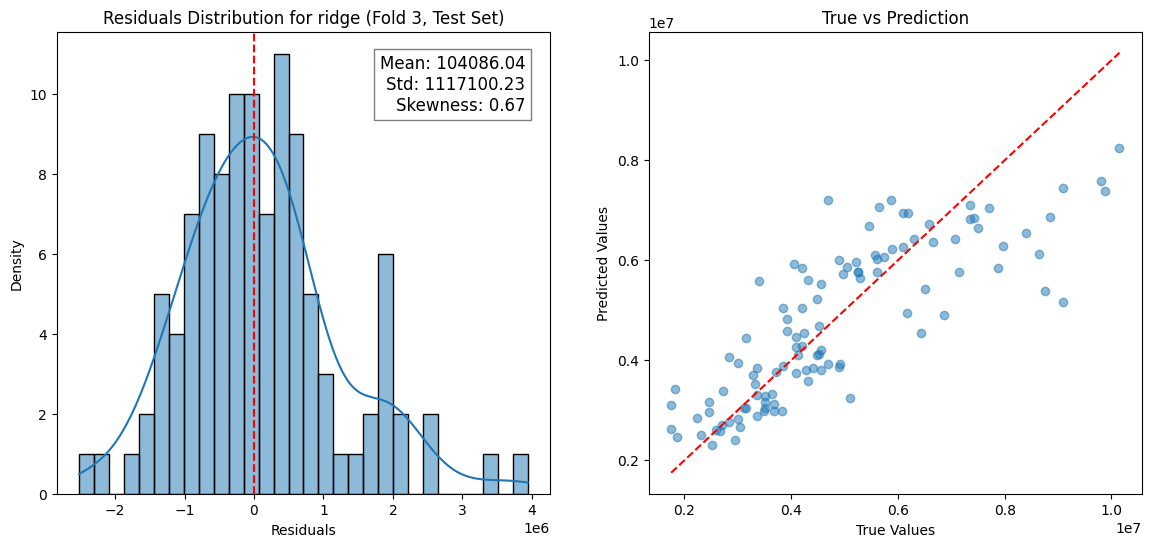

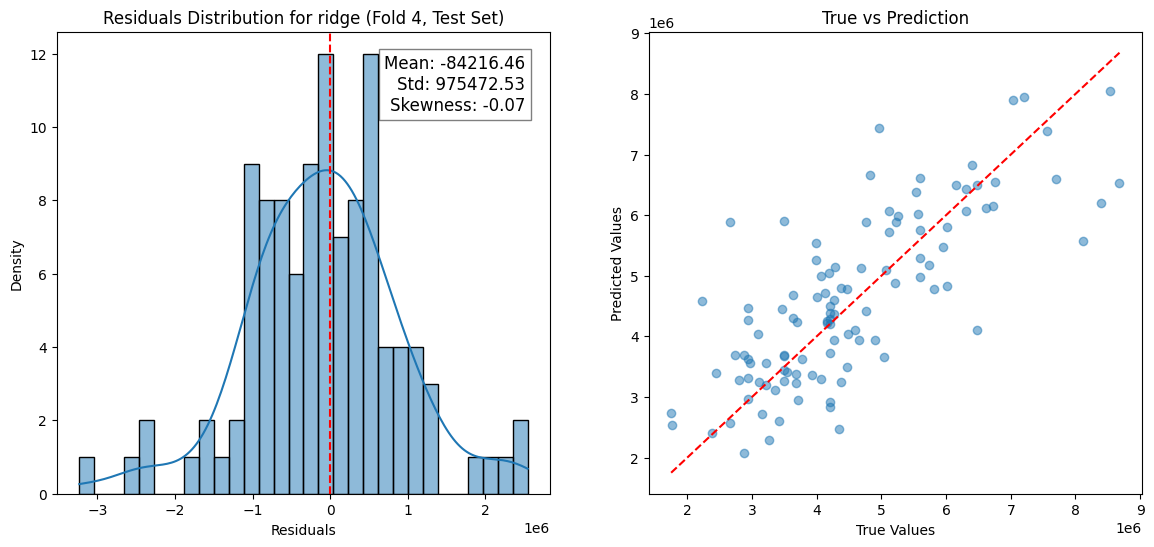

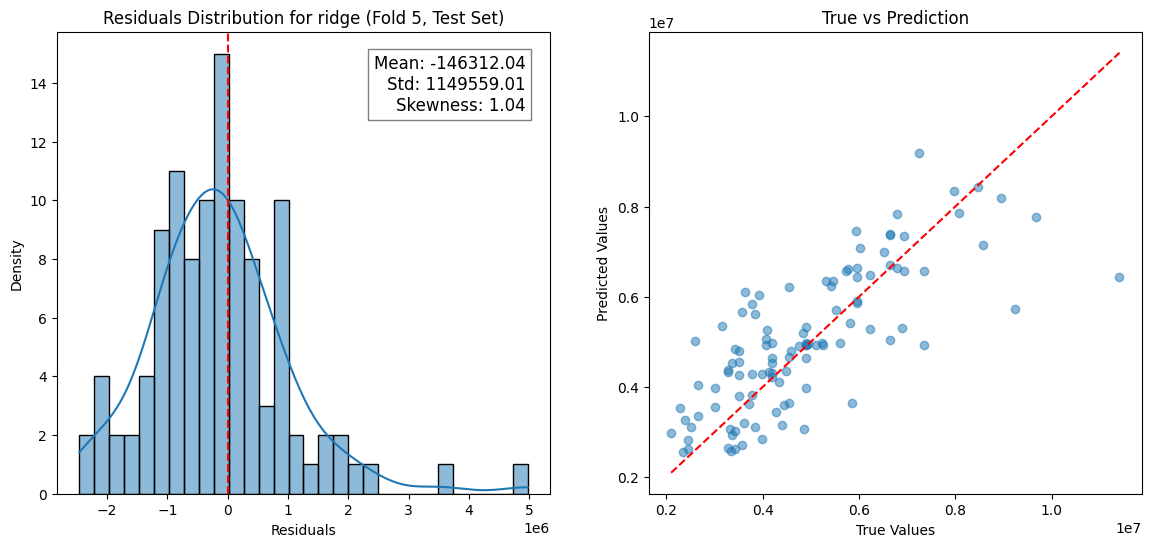

In [6]:
# Function to plot residuals and scatter plot for each fold

model = 'ridge'
for i, (y_true_fold, y_pred_fold) in enumerate(zip(y_true_pred[model]['y_true'], y_true_pred[model]['y_pred'])):
    results_viz.plot_residuals_and_scatter(y_true_fold, y_pred_fold, model_type=model, fold=i, dataset='Test')

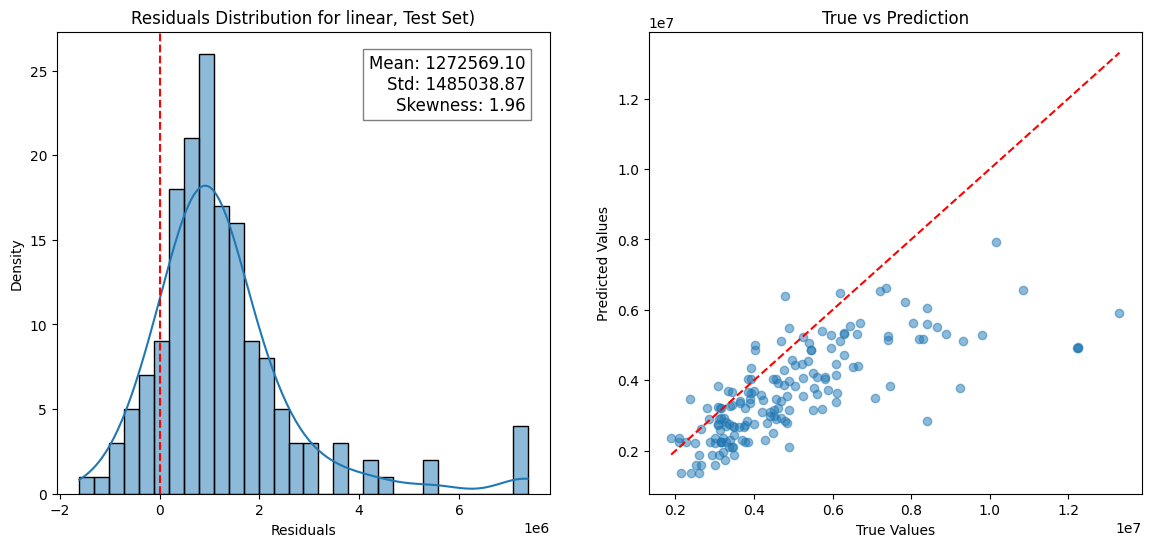

In [8]:
# Residuals analysis just using a train_test_split()

X = df_encoded.drop(columns=['price'])
y = df_encoded.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED)

X_train_scaled, X_test_scaled = data_engineering.feature_scaling_standardization(X_train, X_test)

linear_model = models.train_model(X_train, y_train, model_type='linear')
ridge_model = models.train_model(X_train, y_train, model_type='ridge', alpha=1.0)
lasso_model = models.train_model(X_train, y_train, model_type='lasso', alpha=1.0)
elasticnet_model = models.train_model(X_train, y_train, model_type='elasticnet', alpha=1.0, l1_ratio = 0.5)

# Choose the model you prefer
model = 'linear'
y_test_pred = linear_model.predict(X_test_scaled)

results_viz.plot_residuals_and_scatter(y_test, y_test_pred, model_type=model, dataset='Test')